## 1. Setup and Imports

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)


## 2. Load Data and Split Test Set


In [6]:
filepath = 'fullN_gse1Dpadding_14spins.csv'
df_full = pd.read_csv(filepath)

FileNotFoundError: [Errno 2] No such file or directory: 'fullN_gse1Dpadding_14spins (1).csv'

In [5]:
# Create stratification
df_full['strat_key'] = (df_full['N'].astype(str) + '_' + 
                         df_full['J1'].astype(str) + '_' + 
                         df_full['J2'].astype(str))


In [7]:
# SPLIT 1: Separate test set (15% of data)
# Using stratification to ensure all parameter combinations in each split
df_trainval, df_test = train_test_split(
    df_full, 
    test_size=0.15,  # 15% test
    random_state=42,
    stratify=df_full['strat_key']
)

print(f"  Train+Val: {len(df_trainval):,} samples ({100*len(df_trainval)/len(df_full):.1f}%)")
print(f"  Test:      {len(df_test):,} samples ({100*len(df_test)/len(df_full):.1f}%)")

  Train+Val: 62,653 samples (85.0%)
  Test:      11,057 samples (15.0%)


In [9]:
# SPLIT 2: Further split train+val into train (70%) and validation (15%)
df_train, df_val = train_test_split(
    df_trainval,
    test_size=0.176,  
    random_state=42,
    stratify=df_trainval['strat_key']
)

print(f"  Training:   {len(df_train):,} samples ({100*len(df_train)/len(df_full):.1f}%)")
print(f"  Validation: {len(df_val):,} samples ({100*len(df_val)/len(df_full):.1f}%)")
print(f"  Test:       {len(df_test):,} samples ({100*len(df_test)/len(df_full):.1f}%)")

  Training:   51,626 samples (70.0%)
  Validation: 11,027 samples (15.0%)
  Test:       11,057 samples (15.0%)


In [11]:
# Verify stratification worked - check N distribution
print("\nPercentage of each N in each split:")

train_n_pct = df_train['N'].value_counts(normalize=True).sort_index() * 100
val_n_pct = df_val['N'].value_counts(normalize=True).sort_index() * 100
test_n_pct = df_test['N'].value_counts(normalize=True).sort_index() * 100

comparison = pd.DataFrame({
    'Train %': train_n_pct,
    'Val %': val_n_pct,
    'Test %': test_n_pct
})
print(comparison)


Percentage of each N in each split:
      Train %      Val %     Test %
N                                  
1    0.034866        NaN        NaN
2    0.034866   0.081618   0.081396
3    0.104598   0.081618   0.081396
4    0.205323   0.181373   0.162793
5    0.383528   0.408089   0.406982
6    0.767055   0.816178   0.813964
7    1.568977   1.550739   1.546532
8    3.137954   3.101478   3.093063
9    6.241041   6.284574   6.267523
10  12.499516  12.487531  12.535046
11  25.016465  24.975061  24.988695
12  50.005811  50.031740  50.022610


In [12]:
# Save the splits
# Remove the stratification key before saving
df_train_save = df_train.drop('strat_key', axis=1)
df_val_save = df_val.drop('strat_key', axis=1)
df_test_save = df_test.drop('strat_key', axis=1)

df_train_save.to_csv('train_set.csv', index=False)
df_val_save.to_csv('val_set.csv', index=False)
df_test_save.to_csv('test_set.csv', index=False)


✓ Saved split datasets:
  - train_set.csv
  - val_set.csv
  - test_set.csv


In [13]:
# Work only with training data
df = df_train.copy()

BEGINNING EDA ON TRAINING SET ONLY

Working with 51,626 training samples


## 3. Basic Overview (Training Set)

In [14]:
df.describe()

,N,0,1,2,3,4,5,6,7,8,9,10,11,12,13,J1,J2,Ground_State_Energy,Ground_State_Eigenvectors
count,51626.000000,51626.000000,51626.000000,51626.000000,51626.000000,51626.000000,51626.000000,51626.000000,51626.000000,51626.000000,51626.000000,51626.000000,51626.000000,51626.0,51626.0,51626.000000,51626.000000,51626.000000,51626.000000
mean,11.002615,0.001782,0.006043,0.006276,0.000504,-0.000620,-0.001085,-0.002208,-0.002053,0.003177,0.002867,-0.001298,-0.000310,0.0,0.0,1.666641,0.999961,-7.641376,0.000198
std,1.403093,1.000008,0.999817,0.999641,0.999138,0.998109,0.996186,0.992326,0.984389,0.968316,0.935535,0.866161,0.707155,0.0,0.0,0.816475,0.589244,3.421803,0.037673
min,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.0,0.0,1.000000,0.250000,-13.948405,-0.816497
25%,11.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.0,0.0,1.000000,0.500000,-10.162214,0.000000
50%,12.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.000000,1.000000,-7.500000,0.000000
75%,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.0,0.0,2.000000,1.000000,-4.653726,0.000000
max,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,3.000000,2.000000,0.000000,1.000000


## 4. Feature Analysis (Training Set)

Distribution of N in training set:
N
1        18
2        18
3        54
4       106
5       198
6       396
7       810
8      1620
9      3222
10     6453
11    12915
12    25816
Name: count, dtype: int64


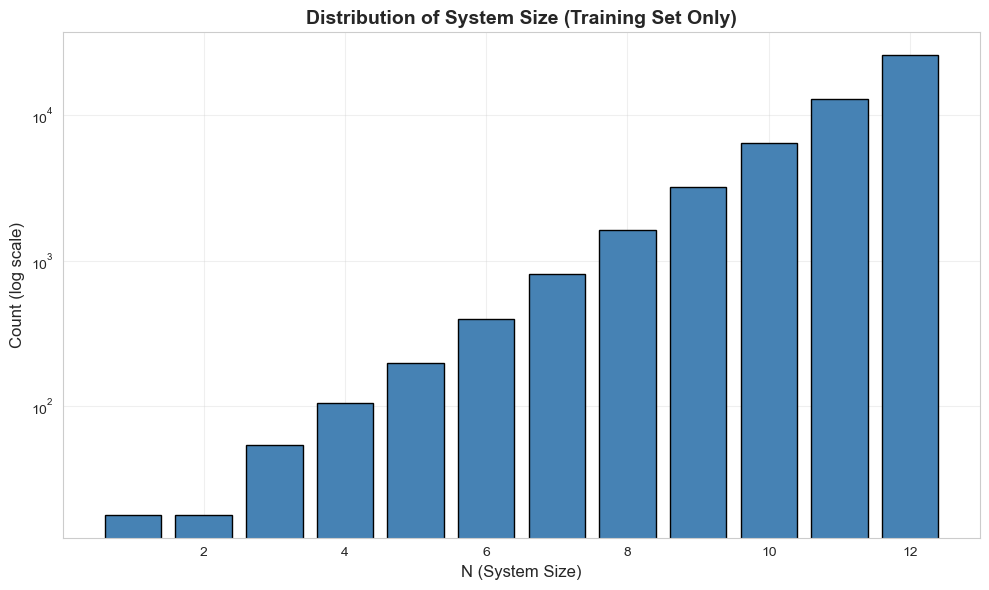

In [15]:
# Distribution of N (system size)
print("Distribution of N in training set:")
print(df['N'].value_counts().sort_index())

plt.figure(figsize=(10, 6))
n_counts = df['N'].value_counts().sort_index()
plt.bar(n_counts.index, n_counts.values, color='steelblue', edgecolor='black')
plt.xlabel('N (System Size)', fontsize=12)
plt.ylabel('Count (log scale)', fontsize=12)
plt.title('Distribution of System Size (Training Set Only)', fontsize=14, fontweight='bold')
plt.yscale('log')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [16]:
# Coupling parameters
print("\nJ1 unique values:", sorted(df['J1'].unique()))
print("J2 unique values:", sorted(df['J2'].unique()))

print("\n(J1, J2) combinations in training set:")
print(df.groupby(['J1', 'J2']).size())


J1 unique values: [1.0, 2.0, 3.0]
J2 unique values: [0.25, 0.5, 0.75, 1.0, 2.0]

(J1, J2) combinations in training set:
J1   J2  
1.0  0.25    5737
     0.50    5735
     0.75    5737
     1.00    5736
     2.00    5736
2.0  0.50    5737
     1.00    5737
3.0  1.00    5736
     2.00    5735
dtype: int64


## 5. Target Variable Analysis (Training Set)

In [17]:
# Ground State Eigenvector statistics
print("Ground State Eigenvector Statistics (Training Set):")
print(f"Min: {df['Ground_State_Eigenvectors'].min():.6f}")
print(f"Max: {df['Ground_State_Eigenvectors'].max():.6f}")
print(f"Mean: {df['Ground_State_Eigenvectors'].mean():.6f}")
print(f"Std: {df['Ground_State_Eigenvectors'].std():.6f}")

# Sparsity analysis
zero_count = (df['Ground_State_Eigenvectors'] == 0).sum()
nonzero_count = (df['Ground_State_Eigenvectors'] != 0).sum()
zero_pct = 100 * zero_count / len(df)

print(f"\nSparsity Analysis:")
print(f"Zero eigenvectors: {zero_count:,} ({zero_pct:.2f}%)")
print(f"Non-zero eigenvectors: {nonzero_count:,} ({100-zero_pct:.2f}%)")

Ground State Eigenvector Statistics (Training Set):
Min: -0.816497
Max: 1.000000
Mean: 0.000198
Std: 0.037673

Sparsity Analysis:
Zero eigenvectors: 39,441 (76.40%)
Non-zero eigenvectors: 12,185 (23.60%)


In [ ]:
# Eigenvector distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# All values
axes[0].hist(df['Ground_State_Eigenvectors'], bins=100, 
             color='lightgreen', edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Ground State Eigenvectors', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Distribution of All Eigenvector Values\n(Training Set)', 
                  fontsize=13, fontweight='bold')
axes[0].axvline(0, color='red', linestyle='--', linewidth=2, label='Zero')
axes[0].legend(fontsize=10)
axes[0].grid(True, alpha=0.3)

# Non-zero values only
nonzero_eigvec = df[df['Ground_State_Eigenvectors'] != 0]['Ground_State_Eigenvectors']
axes[1].hist(nonzero_eigvec, bins=50, color='coral', edgecolor='black', alpha=0.7)
axes[1].set_xlabel('Ground State Eigenvectors', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].set_title('Distribution of Non-Zero Eigenvector Values\n(Training Set)', 
                  fontsize=13, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 6. Energy Analysis (Training Set)

In [4]:
# Ground State Energy statistics
print("Ground State Energy Statistics (Training Set):")
print(f"Min: {df['Ground_State_Energy'].min():.4f}")
print(f"Max: {df['Ground_State_Energy'].max():.4f}")
print(f"Mean: {df['Ground_State_Energy'].mean():.4f}")
print(f"Std: {df['Ground_State_Energy'].std():.4f}")

print("\nMean energy by system size:")
energy_by_n = df.groupby('N')['Ground_State_Energy'].mean()
print(energy_by_n)

Ground State Energy Statistics (Training Set):


NameError: name 'df' is not defined

In [ ]:
# Energy vs N
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Scatter plot
for n in sorted(df['N'].unique()):
    subset = df[df['N'] == n].sample(min(200, len(df[df['N'] == n])), random_state=42)
    axes[0].scatter([n]*len(subset), subset['Ground_State_Energy'], 
                    alpha=0.3, s=10)
n_means = df.groupby('N')['Ground_State_Energy'].mean()
axes[0].plot(n_means.index, n_means.values, color='red', 
             linewidth=3, label='Mean Energy', marker='o')
axes[0].set_xlabel('N (System Size)', fontsize=12)
axes[0].set_ylabel('Ground State Energy', fontsize=12)
axes[0].set_title('Energy vs System Size (Training Set)', fontsize=13, fontweight='bold')
axes[0].legend(fontsize=10)
axes[0].grid(True, alpha=0.3)

# Distribution
axes[1].hist(df['Ground_State_Energy'], bins=50, 
             color='coral', edgecolor='black', alpha=0.7)
axes[1].axvline(df['Ground_State_Energy'].mean(), color='red', 
                linestyle='--', linewidth=2, 
                label=f'Mean: {df["Ground_State_Energy"].mean():.2f}')
axes[1].set_xlabel('Ground State Energy', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].set_title('Energy Distribution (Training Set)', fontsize=13, fontweight='bold')
axes[1].legend(fontsize=10)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 7. Correlation Analysis (Training Set)

In [ ]:
# Correlation matrix
corr_cols = ['N', 'J1', 'J2', 'Ground_State_Energy', 'Ground_State_Eigenvectors']
corr_matrix = df[corr_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.3f', cmap='coolwarm', 
            center=0, square=True, cbar_kws={'label': 'Correlation'},
            vmin=-1, vmax=1)
plt.title('Correlation Matrix (Training Set Only)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nCorrelation with Target (Eigenvectors):")
corr_with_target = df[['N', 'J1', 'J2', 'Ground_State_Energy']].corrwith(
    df['Ground_State_Eigenvectors'])
print(corr_with_target)

## 8. Spin Configuration Analysis (Training Set)

In [ ]:
# Verify spin configuration structure
spin_cols = [str(i) for i in range(14)]

print("Spin configuration verification:")
df['nonzero_spins'] = (df[spin_cols] != 0).sum(axis=1)
mismatch = df[df['nonzero_spins'] != df['N']]

if len(mismatch) == 0:
    print("✓ All rows have correct number of non-zero spins matching N")
else:
    print(f"✗ Found {len(mismatch)} mismatches")

# Magnetization
df['magnetization'] = df[spin_cols].sum(axis=1)
print(f"\nMagnetization statistics:")
print(f"Range: [{df['magnetization'].min():.0f}, {df['magnetization'].max():.0f}]")
print(f"Mean: {df['magnetization'].mean():.6f}")

In [ ]:
# Example spin configurations heatmap
examples_idx = []
for n in [1, 3, 6, 9, 12]:
    n_subset = df[df['N'] == n]
    if len(n_subset) > 0:
        subset = n_subset.sample(min(2, len(n_subset)), random_state=42)
        examples_idx.extend(subset.index.tolist())

example_spins = df.loc[examples_idx[:10], spin_cols].values

plt.figure(figsize=(12, 6))
sns.heatmap(example_spins, cmap='RdBu_r', center=0, 
            yticklabels=[f"N={df.loc[i, 'N']}" for i in examples_idx[:10]], 
            xticklabels=range(14), vmin=-1, vmax=1,
            cbar_kws={'label': 'Spin Value'})
plt.title('Example Spin Configurations (Training Set)', fontsize=14, fontweight='bold')
plt.xlabel('Spin Position', fontsize=12)
plt.ylabel('Sample', fontsize=12)
plt.tight_layout()
plt.show()

## 9. Parameter Regime Analysis (Training Set)

In [ ]:
# J1-J2 parameter space
j_combinations = df.groupby(['J1', 'J2']).size().reset_index(name='count')

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Parameter combinations
scatter = axes[0].scatter(j_combinations['J1'], j_combinations['J2'], 
                          s=j_combinations['count']/50, 
                          c=j_combinations['count'], cmap='viridis', 
                          alpha=0.6, edgecolors='black')
axes[0].set_xlabel('J1', fontsize=12)
axes[0].set_ylabel('J2', fontsize=12)
axes[0].set_title('J1 vs J2 Parameter Combinations\n(Training Set)', 
                  fontsize=13, fontweight='bold')
plt.colorbar(scatter, ax=axes[0], label='Count')
axes[0].grid(True, alpha=0.3)

# Energy landscape
sample_df = df.sample(min(5000, len(df)), random_state=42)
scatter2 = axes[1].scatter(sample_df['J1'], sample_df['J2'], 
                           c=sample_df['Ground_State_Energy'], 
                           cmap='coolwarm', alpha=0.3, s=5)
axes[1].set_xlabel('J1', fontsize=12)
axes[1].set_ylabel('J2', fontsize=12)
axes[1].set_title('Energy Landscape over J1-J2 Space\n(Training Set)', 
                  fontsize=13, fontweight='bold')
plt.colorbar(scatter2, ax=axes[1], label='Ground State Energy')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 10. Summary Statistics (Training Set)

In [ ]:
print("="*80)
print("TRAINING SET SUMMARY")
print("="*80)

print(f"\n1. Size: {len(df):,} samples (70% of full dataset)")
print(f"   - System sizes: N ∈ [{df['N'].min()}, {df['N'].max()}]")
print(f"   - Parameter combinations: {len(df.groupby(['J1', 'J2']))}")

print(f"\n2. Features:")
print(f"   - Spin configurations: 14 positions (padded)")
print(f"   - J1 values: {sorted(df['J1'].unique())}")
print(f"   - J2 values: {sorted(df['J2'].unique())}")

print(f"\n3. Target (Ground State Eigenvectors):")
print(f"   - Range: [{df['Ground_State_Eigenvectors'].min():.4f}, {df['Ground_State_Eigenvectors'].max():.4f}]")
print(f"   - Mean: {df['Ground_State_Eigenvectors'].mean():.6f}")
print(f"   - Sparsity: {zero_pct:.2f}% zeros")

print(f"\n4. Energy:")
print(f"   - Range: [{df['Ground_State_Energy'].min():.4f}, {df['Ground_State_Energy'].max():.4f}]")
print(f"   - Mean: {df['Ground_State_Energy'].mean():.4f}")
print(f"   - Correlation with N: {df[['N', 'Ground_State_Energy']].corr().iloc[0, 1]:.4f}")

print(f"\n5. Data Quality:")
print(f"   - Missing values: {df.isnull().sum().sum()}")
print(f"   - Duplicate rows: {df.duplicated().sum()}")

print("\n" + "="*80)
print("⚠️  REMINDER: Test set ({:,} samples) remains untouched".format(len(df_test)))
print("="*80)

## Summary of Data Splits

**Final Dataset Distribution:**
- **Training Set:** 70% of data - used for all EDA and model training
- **Validation Set:** 15% of data - used for hyperparameter tuning only
- **Test Set:** 15% of data - **ISOLATED** until final evaluation

**Data Leakage Prevention:**
1. ✓ Test set split off before any analysis
2. ✓ All EDA performed on training set only
3. ✓ Validation set will only be used for model selection
4. ✓ Test set will only be used for final performance reporting
5. ✓ Stratified splitting ensures balanced parameter representation

**Files Saved:**
- `train_set.csv` - For model training
- `val_set.csv` - For hyperparameter tuning
- `test_set.csv` - For final evaluation ONLY